In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import warnings
warnings.filterwarnings('ignore')
import copy

Задание 1

In [2]:
data = pd.read_csv('tsp.csv').values
inds = data[:, 0] - 1
x = data[:, 1]
y = data[:, 2]
#plt.scatter(x, y)

In [3]:
def point_dist(x1, y1, x2, y2):
    return abs(x1 - x2) + abs(y1 - y2)


def common_dist(x, y, inds):
    length = len(x)
    d = 0
    for i in range(1, length):
        d += point_dist(x[inds[i-1]], y[inds[i-1]], x[inds[i]], y[inds[i]])
    return d

best_order = inds
best_distance = common_dist(x, y, inds)
print(best_distance)

27815


Distance  26330


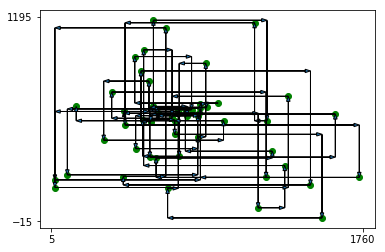

In [212]:
for i in range(1000000):
    np.random.shuffle(inds)
    dist = common_dist(x, y, inds)
    if dist < best_distance - 1:
        best_distance = dist
        best_order = inds

fig, ax = plt.subplots()
plt.scatter(x, y, c='g')
ax.set_xticks([np.min(x) - 20, np.max(x) + 20])
ax.set_yticks([np.min(y) - 20, np.max(y) + 20])
length = len(x)
for i in range(1, length):
    if x[best_order[i-1]] != x[best_order[i]]:
        ax.arrow(x[best_order[i-1]], y[best_order[i-1]], x[best_order[i]] - x[best_order[i-1]], 0,
                width = 0.0001, head_width = 20., length_includes_head=True)
    if y[best_order[i-1]] != y[best_order[i]]:
        ax.arrow(x[best_order[i]], y[best_order[i-1]], 0, y[best_order[i]] - y[best_order[i-1]],
                width = 0.0001, head_width = 20., length_includes_head=True)
print("Distance ", best_distance)

Задание 2

0


27105


100000


200000


26615


300000


26380


400000


500000


600000


700000


800000


900000


Distance  26380


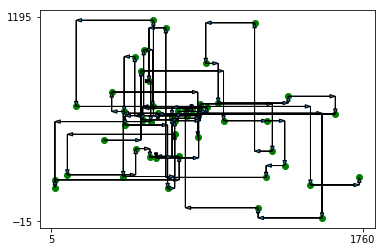

In [218]:
inds = data[:, 0] - 1
best_order = inds
best_distance = common_dist(x, y, inds)
for i in range(1000000):
    np.random.shuffle(inds)
    if i % 100000 == 0:
        print(i)
    order = []
    copy_inds = list(inds)
    while len(copy_inds) != 0:
        random.shuffle(copy_inds)
        order.append(copy_inds.pop())
    dist = common_dist(x, y, order)
    if dist < best_distance - 1:
        print(dist)
        best_distance = dist
        best_order = order

fig, ax = plt.subplots()
plt.scatter(x, y, c='g')
ax.set_xticks([np.min(x) - 20, np.max(x) + 20])
ax.set_yticks([np.min(y) - 20, np.max(y) + 20])
length = len(x)
for i in range(1, length):
    if x[best_order[i-1]] != x[best_order[i]]:
        ax.arrow(x[best_order[i-1]], y[best_order[i-1]], x[best_order[i]] - x[best_order[i-1]], 0,
                width = 0.0001, head_width = 20., length_includes_head=True)
    if y[best_order[i-1]] != y[best_order[i]]:
        ax.arrow(x[best_order[i]], y[best_order[i-1]], 0, y[best_order[i]] - y[best_order[i-1]],
                width = 0.0001, head_width = 20., length_includes_head=True)
print("Distance ", best_distance)

Задание 3

0


12580
1


2


3


12500
4


12415
5


6


7


11425
8


9


10


11


12


13


14


15


16
17


18


19


Distance  11425


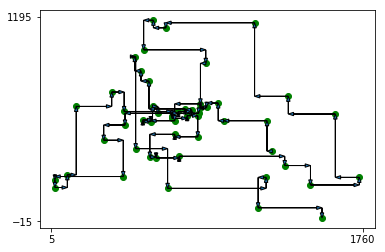

In [243]:
inds = data[:, 0] - 1
best_order = inds
best_distance = common_dist(x, y, inds)
for i in range(20):
    print(i)
    np.random.shuffle(inds)
    cur_dist = common_dist(x, y, inds)
    while True:
        ind1 = 0
        ind2 = 0
        before_dist = common_dist(x, y, inds)
        for j in range(len(x)):
            for k in range(len(y)):
                copy_inds = copy.copy(inds)
                a = copy_inds[j]
                copy_inds[j] = copy_inds[k]
                copy_inds[k] = a
                if common_dist(x, y, copy_inds) < before_dist:
                    ind1 = j
                    ind2 = k
                    before_dist = common_dist(x, y, copy_inds)
        a = inds[ind1]
        inds[ind1] = inds[ind2]
        inds[ind2] = a
        if common_dist(x, y, inds) >= cur_dist:
            break
        else:
            cur_dist = common_dist(x, y, inds)
    dist = common_dist(x, y, inds)
    if dist < best_distance - 1:
        print(dist)
        best_distance = dist
        best_order = inds

fig, ax = plt.subplots()
plt.scatter(x, y, c='g')
ax.set_xticks([np.min(x) - 20, np.max(x) + 20])
ax.set_yticks([np.min(y) - 20, np.max(y) + 20])
length = len(x)
for i in range(1, length):
    if x[best_order[i-1]] != x[best_order[i]]:
        ax.arrow(x[best_order[i-1]], y[best_order[i-1]], x[best_order[i]] - x[best_order[i-1]], 0,
                width = 0.0001, head_width = 20., length_includes_head=True)
    if y[best_order[i-1]] != y[best_order[i]]:
        ax.arrow(x[best_order[i]], y[best_order[i-1]], 0, y[best_order[i]] - y[best_order[i-1]],
                width = 0.0001, head_width = 20., length_includes_head=True)
print("Distance ", best_distance)

Задание 4

In [44]:
inds = data[:, 0] - 1
best_order = inds
best_distance = common_dist(x, y, inds)

In [46]:
for k in range(50):
    print(k, end=" ")
    np.random.shuffle(inds)
    temperature = 1000000
    d = np.zeros((len(inds), len(inds)))
    while temperature > 1:
        cur_dist = common_dist(x, y, inds)
        for i in range(len(inds)):
            for j in range(len(inds)):
                copy_inds = copy.copy(inds)
                a = copy_inds[i]
                copy_inds[i] = copy_inds[j]
                copy_inds[j] = a
                d[i][j] = common_dist(x, y, copy_inds)
        d = cur_dist - d
        probabilities = np.exp(d / temperature)
        probabilities = probabilities / np.sum(probabilities)
        temperature /= 2
        i1, i2 = 0, 0
        maximum = 0
        for i in range(len(inds)):
            for j in range(len(inds)):
                if probabilities[i][j] > maximum:
                    i1, i2 = i, j
                    maximum = probabilities[i][j]
        a = inds[i1]
        inds[i1] = inds[i2]
        inds[i2] = a
    dist = common_dist(x, y, inds)
    if dist < best_distance - 1:
        best_distance = dist
        best_order = inds

0 

1 

2 

3 

4 

5 

6 

7 

8 

9 

10 

11 

12 

13 

14 

15 

16 

17 

18 

19 

20 

21 

22 

23 

24 

25 

26 

27 

28 

29 

30 

31 

32 

33 

34 

35 

36 

37 

38 

39 

40 

41 

42 

43 

44 

45 

46 

47 

48 

49 

Distance  13520


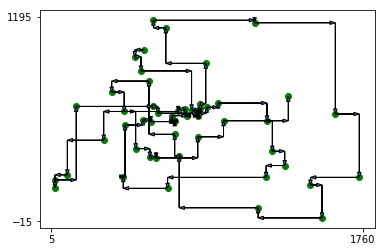

In [47]:
fig, ax = plt.subplots()
plt.scatter(x, y, c='g')
ax.set_xticks([np.min(x) - 20, np.max(x) + 20])
ax.set_yticks([np.min(y) - 20, np.max(y) + 20])
length = len(x)
for i in range(1, length):
    if x[best_order[i-1]] != x[best_order[i]]:
        ax.arrow(x[best_order[i-1]], y[best_order[i-1]], x[best_order[i]] - x[best_order[i-1]], 0,
                width = 0.0001, head_width = 20., length_includes_head=True)
    if y[best_order[i-1]] != y[best_order[i]]:
        ax.arrow(x[best_order[i]], y[best_order[i-1]], 0, y[best_order[i]] - y[best_order[i-1]],
                width = 0.0001, head_width = 20., length_includes_head=True)
print("Distance ", best_distance)